# **Dataset Initializing**

In [ ]:
# importing librariries- arff for load arff file and panda for converting this file into dataframe
import pandas as pd
from scipy.io import arff
# Load the ARFF file
arff_file = arff.loadarff('wine_quality.arff')
# Convert to a pandas DataFrame
df = pd.DataFrame(arff_file[0])

# **Data Analytics**

In [ ]:
df.head() #it shows top 5 rows from dataset

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [ ]:
df.shape #it shows how many rows and columns are there in dataset

(6497, 12)

In [ ]:
df.describe().T #it shows statistical values of dataset

,count,mean,std,min,25%,50%,75%,max
fixed.acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile.acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric.acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual.sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free.sulfur.dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total.sulfur.dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [ ]:
df.info() #it shows each columns data's information,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   float64
dtypes: float64(12)
memory usage: 609.2 KB


# **Null Values**

In [ ]:
df.isnull().sum().sum() #checking how many null value we have

0

# **Duplicate Value**

In [ ]:
df.duplicated().sum() #checking how many duplicate row I have

1179

In [ ]:
df = df.drop_duplicates() #initially I dropped this but it decrease model perfomance

In [ ]:
df.shape #after removing it shows new row

(5318, 12)

In [ ]:
df.duplicated().sum() #when we dropped after that we again check that duplicate exist or not

0

# **Feature Contribution Visualization**

In [ ]:
#importing matplotlib and seaborn librariries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.skew().sort_values(ascending=False) #check skew status of each features

,0
chlorides,5.399828
sulphates,1.797270
fixed.acidity,1.723290
volatile.acidity,1.495097
residual.sugar,1.435404
free.sulfur.dioxide,1.220066
alcohol,0.565718
density,0.503602
citric.acid,0.471731
pH,0.386839


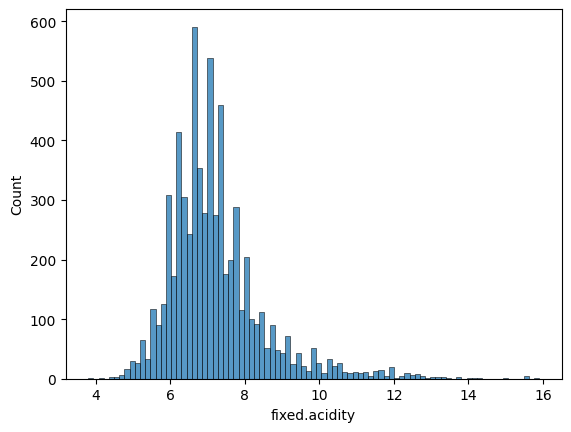

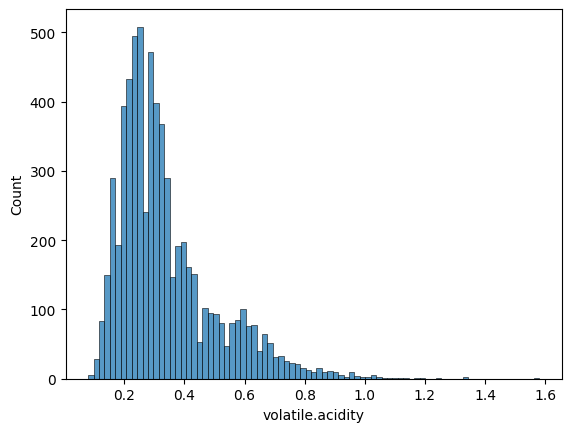

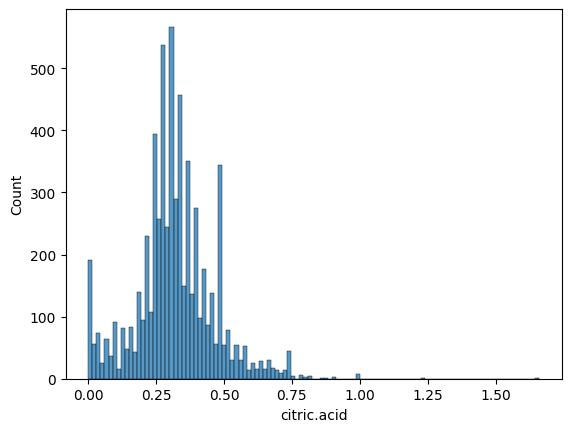

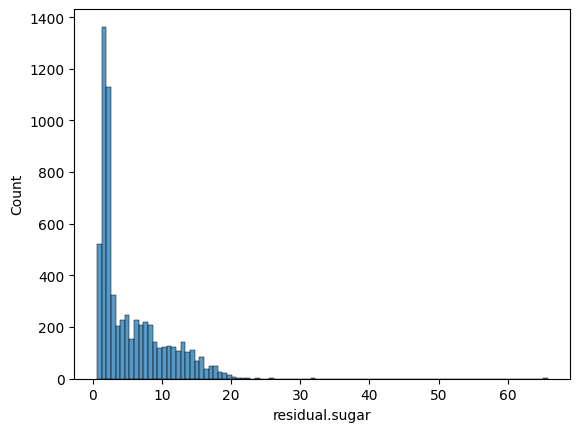

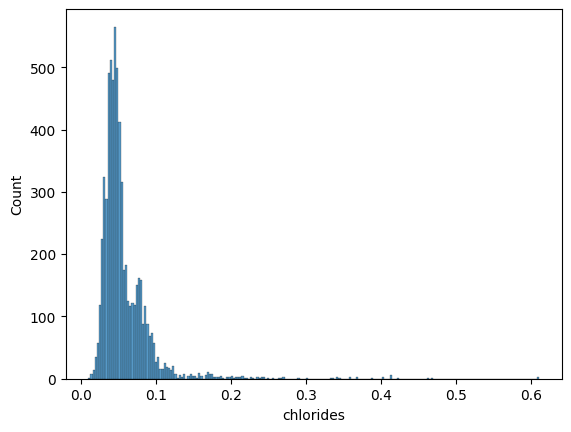

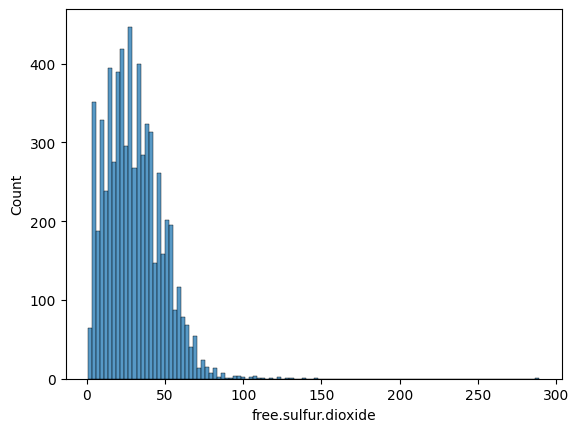

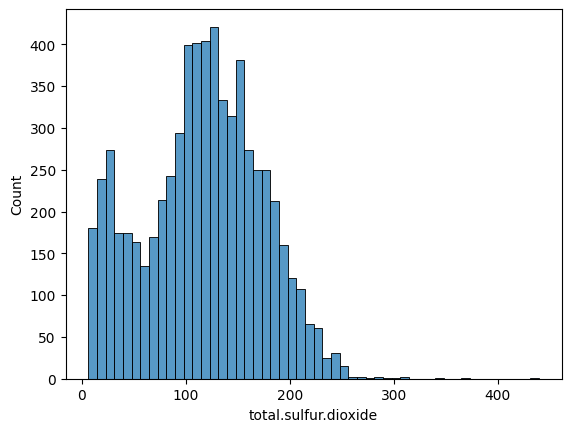

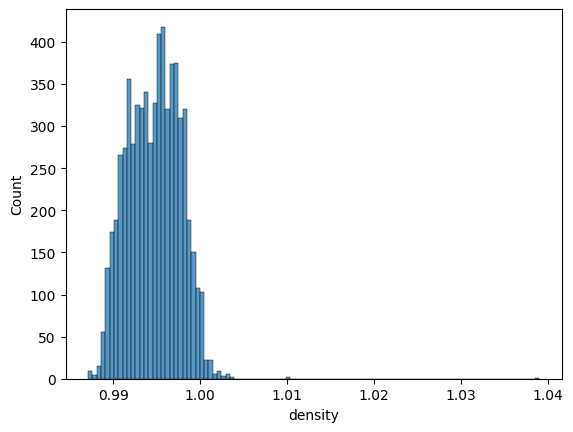

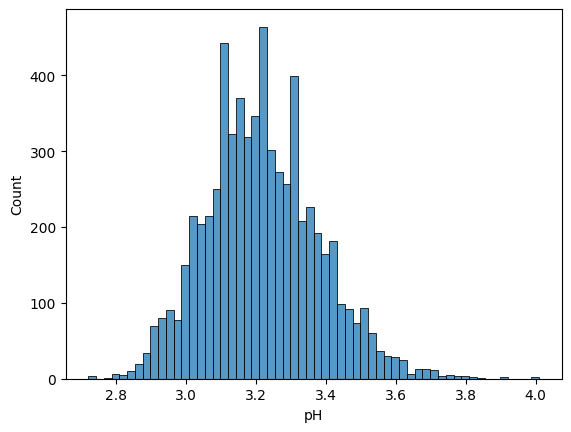

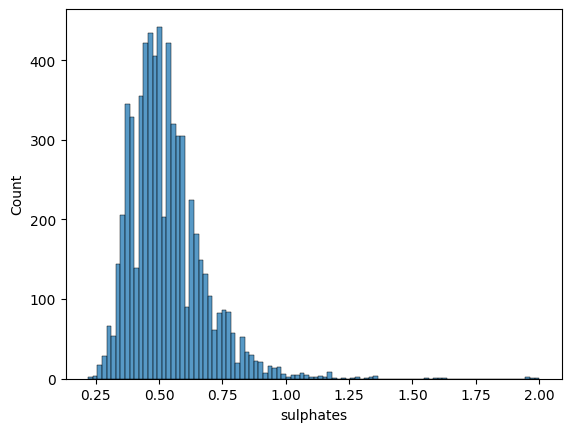

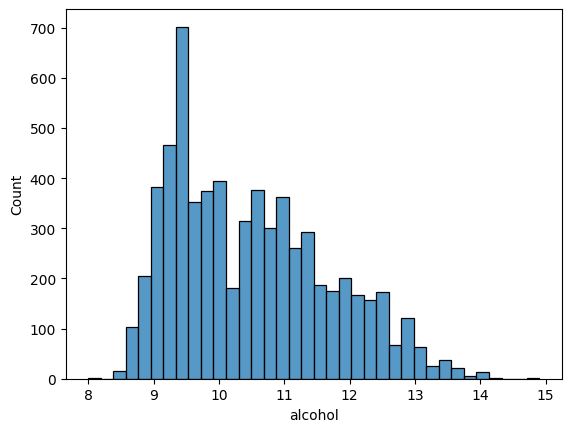

In [ ]:
#Without my target feature 'quality' i want to display others histoplot to identify skew and outliers
for i in list(df.columns):
  if i!='quality':
      sns.histplot(data=df,x=i)
      plt.show()

From these graphs and skew value we can see that 'residual.sugar', 'chlorides','volatile.acidity','free.sulfur.dioxide','sulphates','fixed.acidity' these column has right skewness. so we need to do transform these features


In [ ]:
import numpy as np #import numpy libraries to calculate logarithm
for feature in ['residual.sugar', 'chlorides','volatile.acidity','free.sulfur.dioxide','sulphates','fixed.acidity']:
    df[feature] = df[feature].apply(lambda x: np.log1p(x)) #apply log1(x) transformation to fix those column skewness

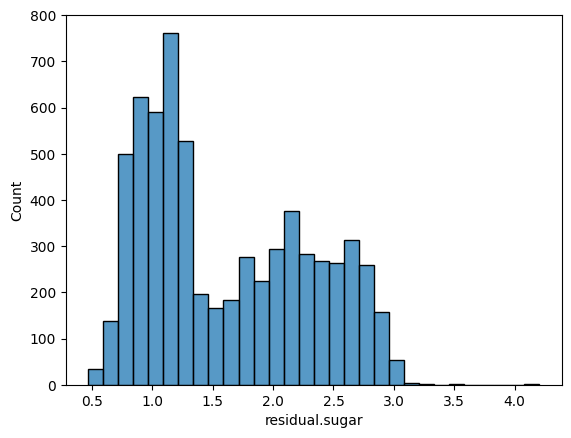

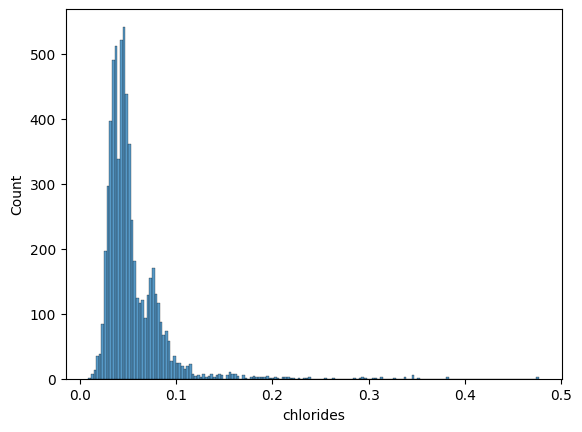

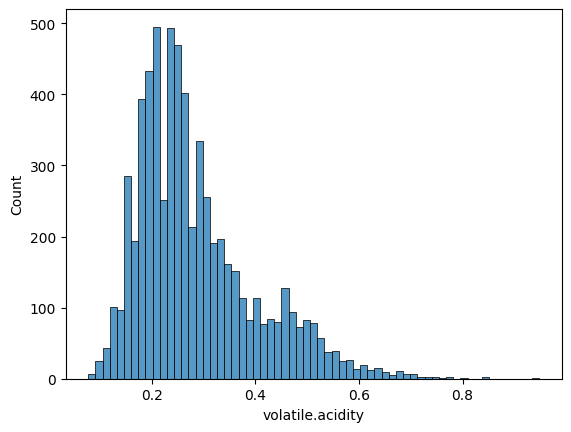

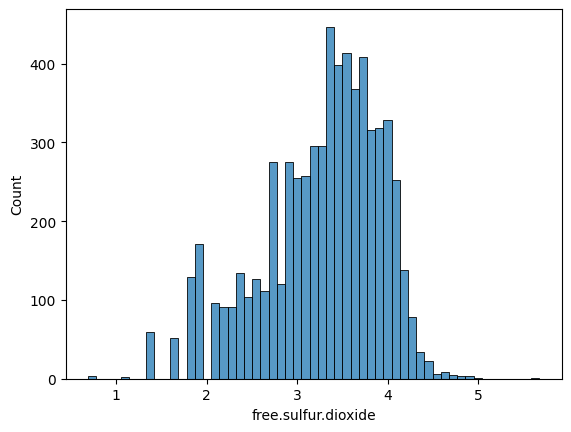

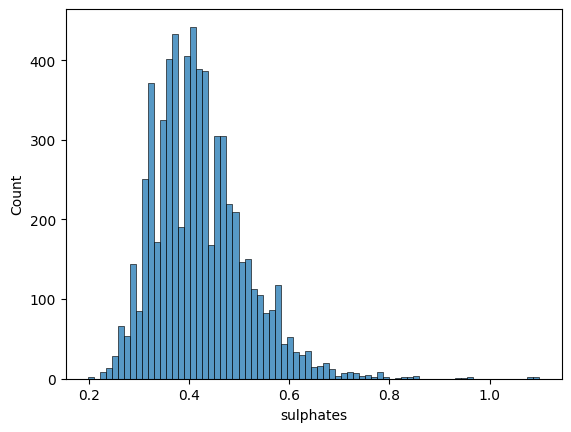

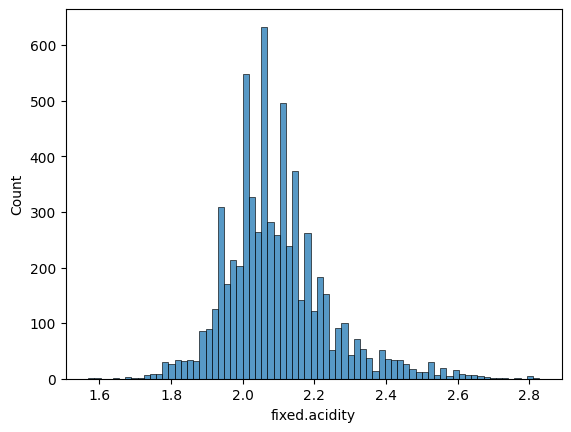

In [ ]:
#new graph after transformation
for i in ['residual.sugar', 'chlorides','volatile.acidity','free.sulfur.dioxide','sulphates','fixed.acidity']:
  sns.histplot(data=df,x=i)
  plt.show()

Feom here we can see that chlorides, residual sugar, and sulphates features has extreme outliers. So, we need to fix it using capping

# **Correlation Observation**

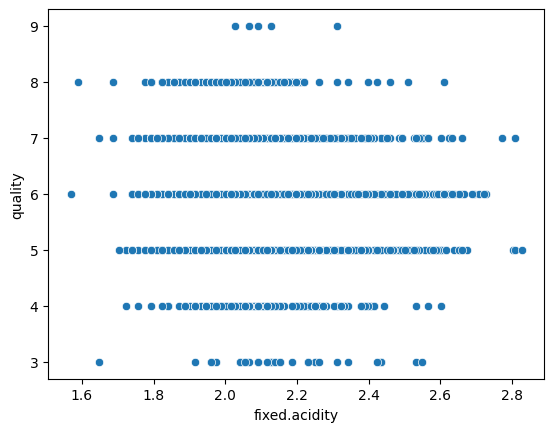

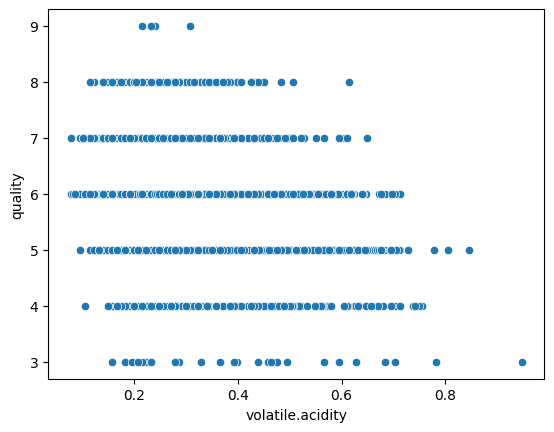

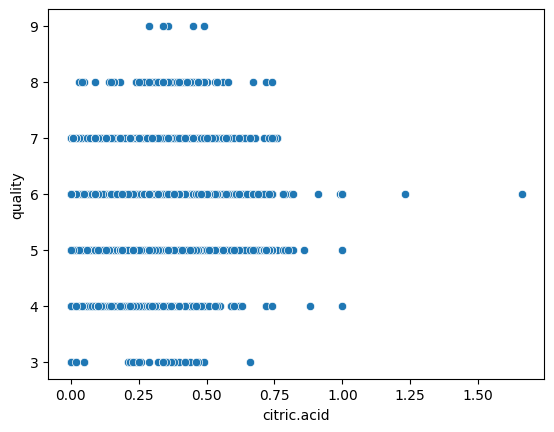

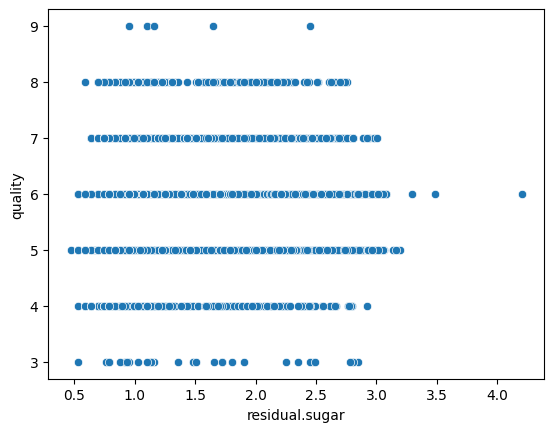

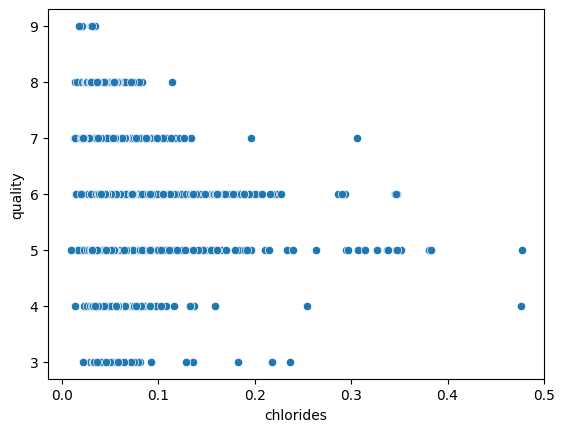

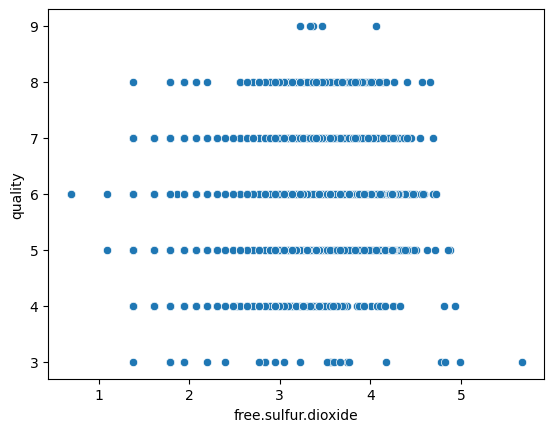

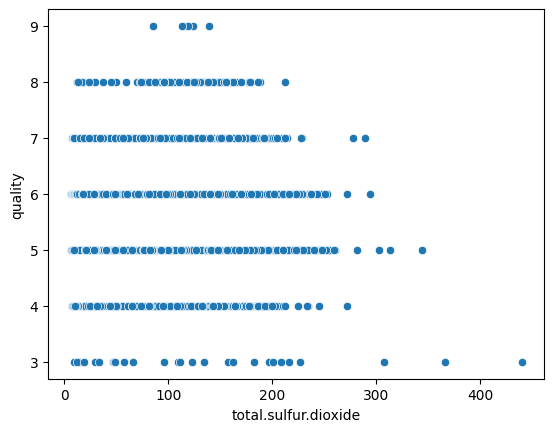

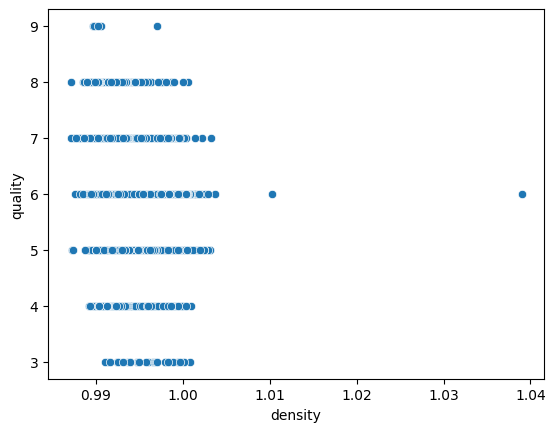

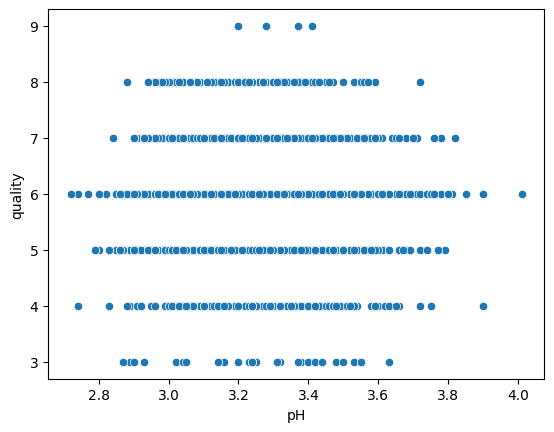

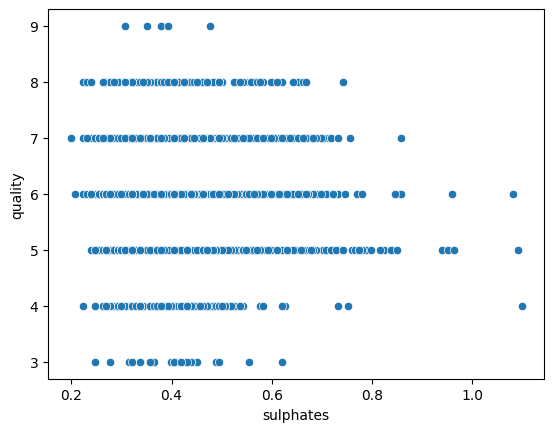

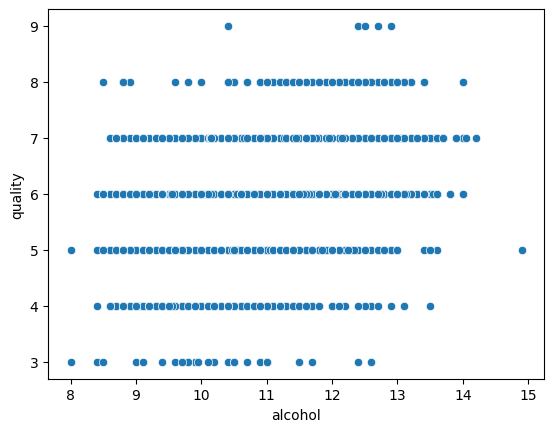

In [ ]:
#here i can see the correlation graph for others features with my target feature quality
for i in list(df.columns):
  if i!='quality':
    sns.scatterplot(data=df,x=i,y='quality')
    plt.show()


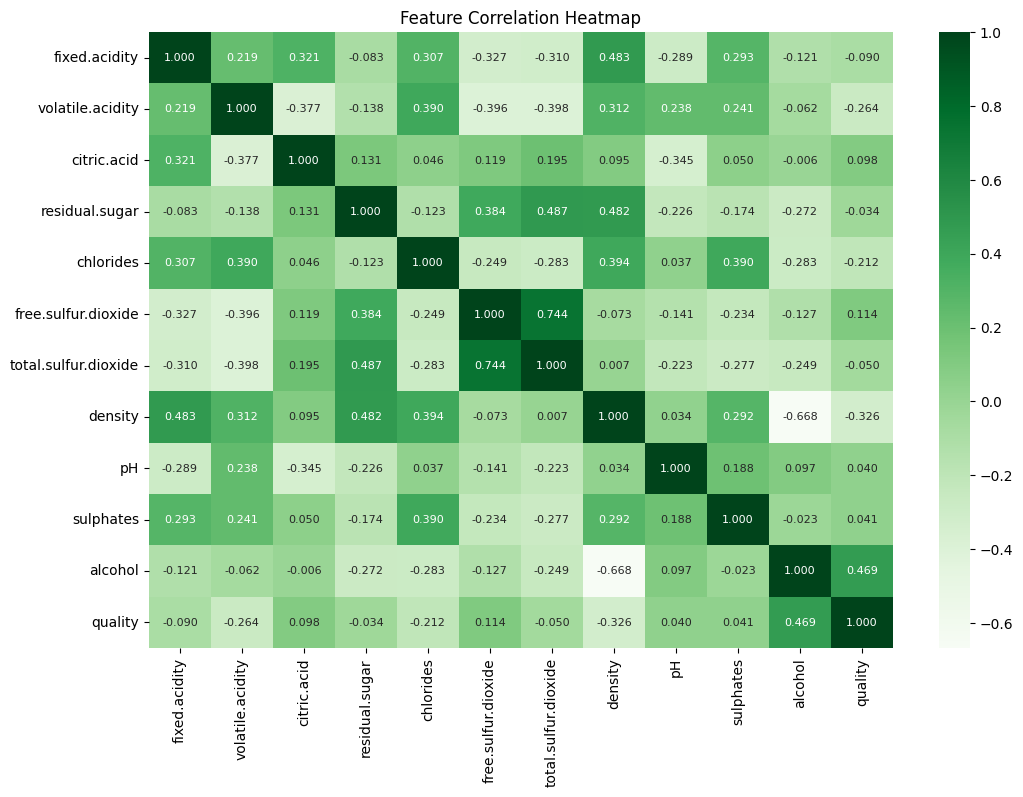

In [ ]:
#this heatmap shows the correlation of 1 featuer to other features in numeric
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cbar=True, square=False, fmt='.3f', annot=True, annot_kws={'size':8}, cmap='Greens')
plt.title("Feature Correlation Heatmap")
plt.show()

# **Model Implementation**

In [ ]:
# to implement model i split my data in x and y at first
X = df.drop('quality',axis=1) # x contain others feature except quality
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0) # y contain only quality but as in my quality feature contains multiple classification so i converted it into binary classification

In [ ]:
from sklearn.model_selection import train_test_split # for splitting train-test i need to import this library
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #split the dataset in 80% and 20% for training and testing

Random Forest Classifier

In [ ]:
def random_forest(X_train, X_test, Y_train):
    from sklearn.ensemble import RandomForestClassifier #import random forest classifier from sklearn
    #applying random forest classifier
    rf_model = RandomForestClassifier(
        n_estimators=100,          # Default
        criterion='entropy',       # Use 'entropy' for information gain
        max_depth=10,              # Limit max depth for overfitting
        min_samples_split=2,       # Minimum 5 samples to split a node
        min_samples_leaf=1,        # Default
        max_features='sqrt',       # Use sqrt(n_features) to reduce complexity
        bootstrap=True,            # Default
        oob_score=False,           # Enable out-of-bag error to assess generalization
        class_weight='balanced',   # Adjust class weights to balance classes as our class data are imbalanced so it will focus on minority data
        random_state=42            # Set random state for reproducibility
    )
    rf_model.fit(X_train, Y_train) #fit this model with training data
    rf_pred = rf_model.predict(X_test) #it return predicted value
    return rf_model, rf_pred #finally this function return model and its prediction. So that i can work with it next

def decision_tree(X_train, X_test, Y_train):
    from sklearn.tree import DecisionTreeClassifier
    dt_model = DecisionTreeClassifier(
        criterion='entropy',       # Use 'entropy' for information gain
        splitter='best',           # Default
        max_depth=10,              # Limit max depth for overfitting
        min_samples_split=2,       # Require at least 5 samples to split
        min_samples_leaf=1,        # Minimum 2 samples required at leaf nodes
        max_features='sqrt',       # Use sqrt(n_features) to reduce complexity (commonly used)
        class_weight='balanced',   # Adjust class weights to balance classes as our class data are imbalanced so it will focus on minority data
        random_state=42            # Set random state for reproducibility
    )
    dt_model.fit(X_train, Y_train) #fit this model with training data
    dt_pred = dt_model.predict(X_test) it return predicted value
    return dt_model, dt_pred #finally this function return model and its prediction. So that i can work with it next

# **Model Evaluation**

In [ ]:
# importing neccessary libraries for evaluation these models
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score

In [ ]:
# Train and evaluate Random Forest
#score() for each model return it's accuracy
rf_model, rf_pred = random_forest(X_train, X_test, Y_train)
print(f"Random Forest Accuracy: {rf_model.score(X_test, Y_test) * 100:.2f}%")

# Train and evaluate Decision Tree
dt_model, dt_pred = decision_tree(X_train, X_test, Y_train)
print(f"Decision Tree Accuracy: {dt_model.score(X_test, Y_test) * 100:.2f}%")

Random Forest Accuracy: 84.08%
Decision Tree Accuracy: 74.77%


In [ ]:
rf_precision_Score = precision_score(Y_test, rf_pred)
print(f"Random Forest Precision Score: {rf_precision_Score:.2f}") #random forest precision score
rf_recall_Score = recall_score(Y_test, rf_pred)
print(f"Random Forest Recall Score: {rf_recall_Score:.2f}") #random forest recall score
rf_f1_Score = f1_score(Y_test, rf_pred)
print(f"Random Forest F1 Score: {rf_f1_Score:.2f}") #random forest f1 score

Random Forest Precision Score: 0.57
Random Forest Recall Score: 0.75
Random Forest F1 Score: 0.65


In [ ]:
dt_precision_Score = precision_score(Y_test, dt_pred)
print(f"Decision Tree Precision Score: {dt_precision_Score:.2f}") #Decision tree precision score
dt_recall_Score = recall_score(Y_test, dt_pred)
print(f"Decision Tree Recall Score: {dt_recall_Score:.2f}") #Decision Tree recall score
dt_f1_Score = f1_score(Y_test, dt_pred)
print(f"Decision Tree F1 Score: {dt_f1_Score:.2f}") #Decision tree f1 score

Decision Tree Precision Score: 0.42
Decision Tree Recall Score: 0.81
Decision Tree F1 Score: 0.56


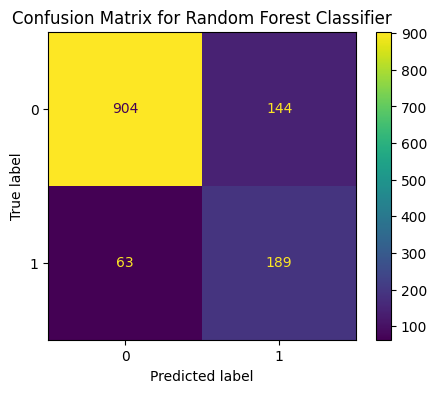

In [ ]:
#creating confusion matrix for random forest
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cm = confusion_matrix(Y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(ax=ax)

# Set the title for the confusion matrix
ax.set_title('Confusion Matrix for Random Forest Classifier')

# Display the plot
plt.show()

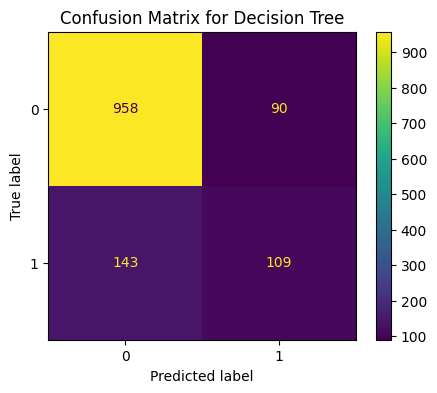

In [ ]:
fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(Y_test, dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(ax=ax)
# Set the title for the confusion matrix
ax.set_title('Confusion Matrix for Decision Tree')

# Display the plot
plt.show()

In [ ]:
rf_report = classification_report(Y_test, rf_pred)
print("Random Forest Classification Report:") #it return the overall report that i seen for random forest
print(rf_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90      1048
           1       0.57      0.75      0.65       252

    accuracy                           0.84      1300
   macro avg       0.75      0.81      0.77      1300
weighted avg       0.86      0.84      0.85      1300



In [ ]:
dt_report = classification_report(Y_test, dt_pred)
print("Decision Tree Classification Report:") #it return the overall report that i seen for decision tree
print(dt_report)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1048
           1       0.42      0.81      0.56       252

    accuracy                           0.75      1300
   macro avg       0.68      0.77      0.69      1300
weighted avg       0.84      0.75      0.77      1300



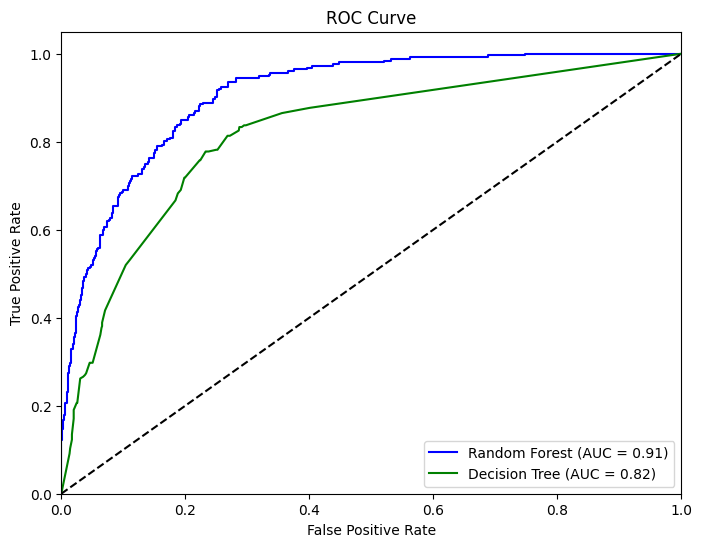

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Generate ROC and AUC for Random Forest
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Get the probabilities for class 1
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Generate ROC and AUC for Decision Tree
dt_probs = dt_model.predict_proba(X_test)[:, 1]  # Get the probabilities for class 1
dt_fpr, dt_tpr, _ = roc_curve(Y_test, dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='blue')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})', color='green')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


# **Visualization For Report**

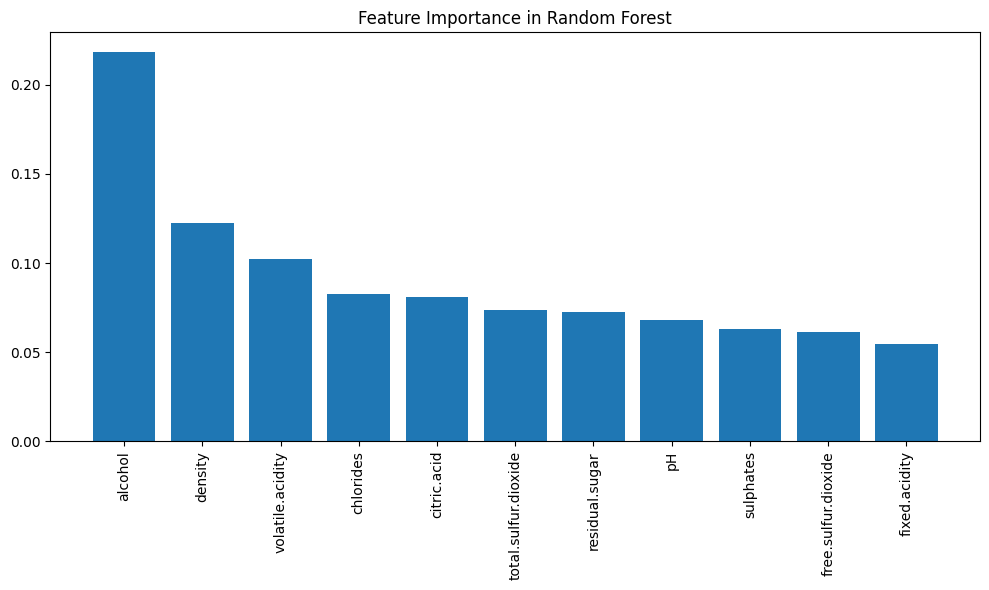

In [ ]:
# Get feature importance from the Random Forest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10,6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


# **Experiment with test data**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test data for Random Forest
rf_pred_test = rf_model.predict(X_test)

# Predict on the test data for Decision Tree
dt_pred_test = dt_model.predict(X_test)

# Random Forest Results
print("Random Forest Test Results:")
print(f"Accuracy: {accuracy_score(Y_test, rf_pred_test) * 100:.2f}%")
print("Classification Report:")
print(classification_report(Y_test, rf_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, rf_pred_test))

# Decision Tree Results
print("\nDecision Tree Test Results:")
print(f"Accuracy: {accuracy_score(Y_test, dt_pred_test) * 100:.2f}%")
print("Classification Report:")
print(classification_report(Y_test, dt_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, dt_pred_test))


Random Forest Test Results:
Accuracy: 84.08%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90      1048
           1       0.57      0.75      0.65       252

    accuracy                           0.84      1300
   macro avg       0.75      0.81      0.77      1300
weighted avg       0.86      0.84      0.85      1300

Confusion Matrix:
[[904 144]
 [ 63 189]]

Decision Tree Test Results:
Accuracy: 74.77%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1048
           1       0.42      0.81      0.56       252

    accuracy                           0.75      1300
   macro avg       0.68      0.77      0.69      1300
weighted avg       0.84      0.75      0.77      1300

Confusion Matrix:
[[767 281]
 [ 47 205]]


In [ ]:
import pandas as pd

# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': Y_test,
    'Random_Forest_Predicted': rf_pred_test,
    'Decision_Tree_Predicted': dt_pred_test
})

# Display the first few rows of the comparison
comparison_df.head()


,Actual,Random_Forest_Predicted,Decision_Tree_Predicted
3103,1,1,1
1419,0,0,0
4761,1,1,1
4690,0,0,0
4032,0,0,0


# **Testing with random input value**

In [ ]:
import numpy as np

# Example of a sample input
sample_input = np.array([[7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]]) # i take some random input value for each feature

# Predict with Random Forest
rf_sample_prediction = rf_model.predict(sample_input)
rf_result = 'Good Wine' if rf_sample_prediction == 1 else 'Bad Wine' # as i define in previous that 0 for Bad wine and 1 for Good wine
print(f"Random Forest Prediction: {rf_result}")

# Predict with Decision Tree
dt_sample_prediction = dt_model.predict(sample_input)
dt_result = 'Good Wine' if dt_sample_prediction == 1 else 'Bad Wine'
print(f"Decision Tree Prediction: {dt_result}")


Random Forest Prediction: Bad Wine
Decision Tree Prediction: Bad Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
